In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt #use .strptime; shouldn't need to zero pad # .striptime didn't work.

In [2]:
u_2016 = pd.read_csv("raw_data/u_city_3_yrs_vehicle_stops _2016.csv", parse_dates=[' STOP_DATE', ' TIME_OF_STOP']) #Time not recognizing as time/date object. Need reformatting first?
u_2017 = pd.read_csv("raw_data/u_city_3_yrs_vehicle_stops _2017.csv", parse_dates=[' STOP_DATE', ' TIME_OF_STOP']) #Couldn't figure out for first project.
u_2018 = pd.read_csv("raw_data/u_city_3_yrs_vehicle_stops _2018.csv", parse_dates=[' STOP_DATE', ' TIME_OF_STOP']) #Need regex methods? Check that. Ask mentors if can't figure out.

In [3]:
display(u_2016.head())
display(u_2017.head())
display(u_2018.head())

,ORI,DSN,STOP_DATE,SEQ_NO,REF_NO,EVENT_NO,SEX,RACE,AGE_CODE,GEO,...,SECOND_DSN,TIME_OF_STOP,RACE_BEFORE_STOP,RES_JURISDICTION,STOP_NO_ACTION,SEARCH_BOTH,CHRG_TRAFF_VIOL,VIOL_INVESTIGATIVE,STOP_OTHER,STATUS_CODE
0,MO0957300,516,2016-01-01,0,TA00000122,NaN,M,B,B,NaN,...,NaN,2220,N,N,N,NaN,NaN,NaN,NaN,FIN
1,MO0957300,516,2016-01-01,1,TA00000123,NaN,F,B,D,NaN,...,NaN,2243,N,Y,NaN,NaN,NaN,NaN,NaN,FIN
2,MO0957300,516,2016-01-01,2,TA00000124,NaN,M,B,B,NaN,...,NaN,2310,N,N,NaN,NaN,NaN,NaN,NaN,FIN
3,MO0957300,495,2016-01-01,0,TA00000138,NaN,M,B,C,NaN,...,NaN,1934,N,Y,NaN,NaN,NaN,NaN,NaN,FIN
4,MO0957300,506,2016-01-01,0,TA00000147,NaN,F,W,D,NaN,...,NaN,2018,N,Y,NaN,NaN,NaN,NaN,NaN,FIN


,ORI,DSN,STOP_DATE,SEQ_NO,REF_NO,EVENT_NO,SEX,RACE,AGE_CODE,GEO,...,SECOND_DSN,TIME_OF_STOP,RACE_BEFORE_STOP,RES_JURISDICTION,STOP_NO_ACTION,SEARCH_BOTH,CHRG_TRAFF_VIOL,VIOL_INVESTIGATIVE,STOP_OTHER,STATUS_CODE
0,MO0957300,514,2017-01-03,0,TA00393909,NaN,M,B,B,NaN,...,NaN,135,N,N,N,NaN,NaN,I,NaN,FIN
1,MO0957300,515,2017-01-03,0,TA00393945,NaN,F,W,D,NaN,...,NaN,755,N,N,NaN,NaN,NaN,NaN,NaN,FIN
2,MO0957300,515,2017-01-03,1,TA00393946,NaN,M,B,D,NaN,...,NaN,850,N,Y,NaN,NaN,NaN,NaN,NaN,FIN
3,MO0957300,515,2017-01-03,2,TA00393947,NaN,M,B,D,NaN,...,NaN,1340,N,Y,NaN,NaN,NaN,NaN,NaN,FIN
4,MO0957300,515,2017-01-03,3,TA00393948,NaN,M,W,D,NaN,...,NaN,1350,N,N,NaN,NaN,NaN,NaN,NaN,FIN


,ORI,DSN,STOP_DATE,TIME_OF_STOP,SEQ_NO,REF_NO,EVENT_NO,RACE_BEFORE_STOP,RES_JURISDICTION,SEX,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,MO0957300,503,2018-01-01,1100,0,TA00802186,NaN,N,Y,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MO0957300,434,2018-01-01,1819,0,TA00802235,NaN,N,N,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MO0957300,453,2018-01-01,1756,0,TA00802261,NaN,N,Y,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MO0957300,518,2018-01-01,1820,0,TA00802444,NaN,N,N,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MO0957300,518,2018-01-01,1347,1,TA00802445,NaN,N,N,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
u_3_yrs = pd.concat([u_2016, u_2017, u_2018], ignore_index=True, verify_integrity=True)
# time_of_stop = u_3_yrs[' TIME_OF_STOP']                  #Need lambda map applied or possibly use pd.to_datetime
# for t in time_of_stop:
#     dt.strptime(time_of_stop, "%H%M")

display(u_3_yrs.head())

,ORI,DSN,STOP_DATE,SEQ_NO,REF_NO,EVENT_NO,SEX,RACE,AGE_CODE,GEO,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,MO0957300,516,2016-01-01,0,TA00000122,NaN,M,B,B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MO0957300,516,2016-01-01,1,TA00000123,NaN,F,B,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MO0957300,516,2016-01-01,2,TA00000124,NaN,M,B,B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MO0957300,495,2016-01-01,0,TA00000138,NaN,M,B,C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MO0957300,506,2016-01-01,0,TA00000147,NaN,F,W,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.get_dummies(u_3_yrs[[' MOVING_SPEED', ' MOVING_LANE']])

,MOVING_SPEED_S,MOVING_LANE_I
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
17600,0,0
17601,0,0
17602,0,0
17603,0,0


In [6]:
# pd.to_datetime(u_3_yrs[' TIME_OF_STOP'], format="%-H%-M")

display(u_3_yrs.tail())
display(u_3_yrs.describe())
u_3_yrs.info()

,ORI,DSN,STOP_DATE,SEQ_NO,REF_NO,EVENT_NO,SEX,RACE,AGE_CODE,GEO,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
17600,MO0957300,537,2018-12-31,0,TA01307419,18-36160,M,B,C,NaN,...,NaN,NaN,NaN,NaN,MIDLAND,DR,Drive,University City,MO,63130.0
17601,MO0957300,537,2018-12-31,0,TA01307421,18-36165,M,W,C,NaN,...,NaN,NaN,NaN,NaN,BRADDOCK,DR,Drive,University City,MO,63130.0
17602,MO0957300,400,2018-12-31,0,TA01307424,18-36140,M,U,C,NaN,...,NaN,NaN,NaN,NaN,MIDLAND,DR,Drive,University City,MO,63130.0
17603,MO0957300,485,2018-12-31,0,TA01307427,18-36138,M,W,C,NaN,...,NaN,NaN,NaN,NaN,HAFNER,PL,Place,University City,MO,63130.0
17604,MO0957300,531,2018-12-31,0,TA01307447,NaN,F,W,D,NaN,...,NaN,NaN,NaN,NaN,81ST,ST,Street,University City,MO,63130.0


,DSN,SEQ_NO,NLCCODE,MOVINGHAZEQUIPIND,STOPARRESTIND,DELETE_FLAG,LAST_UPDATE_ACTION,DISTRICT,SECOND_DSN,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 90
count,17605.000000,17605.000000,0.0,0.0,0.0,0.0,0.0,0.0,267.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
mean,539.640045,0.652996,NaN,NaN,NaN,NaN,NaN,NaN,652.220974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63130.0
std,1254.134177,1.271736,NaN,NaN,NaN,NaN,NaN,NaN,2517.375285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63130.0
25%,485.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,514.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63130.0
50%,510.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,516.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63130.0
75%,519.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,518.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63130.0
max,51519.000000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,41619.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63130.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17605 entries, 0 to 17604
Data columns (total 91 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ORI                  17605 non-null  object        
 1    DSN                 17605 non-null  int64         
 2    STOP_DATE           17605 non-null  datetime64[ns]
 3    SEQ_NO              17605 non-null  int64         
 4    REF_NO              17605 non-null  object        
 5    EVENT_NO            2575 non-null   object        
 6    SEX                 17605 non-null  object        
 7    RACE                17605 non-null  object        
 8    AGE_CODE            17605 non-null  object        
 9    GEO                 2 non-null      object        
 10   NLCCODE             0 non-null      float64       
 11   STOP_LOCATION       17605 non-null  object        
 12   VIOL_MOVING         8961 non-null   object        
 13   VIOL_EQUIPMENT      3244 non-n

In [27]:
#Ideas for later: For the ML portion, should I one-hot encode the different kind of violations? What about the race, gender, etc?

#Summary statistics to possibly include:
# Disparity index = (proportion of stops / proportion of population). A value of 1 represents no disparity; values greater than 1 indicate over-representation, values less than 1 indicate under-representation.
# Search rate = (searches / stops) X 100.
# Contraband hit rate = (searches with contraband found / total searches) X 100.
# Arrest rate = (arrests / stops) X 100.
# More info here - https://ago.mo.gov/home/vehicle-stops-report

# JPGs describing col vals downloaded and placed in raw_data folder

# DSN == Officer serial number/identifier

In [22]:
#Droping NaN columns from the raw data, adding how modifier to not lose relevant data
u_3_yrs.dropna(axis=1, how='all', inplace=True)

#Dropping last 30 or so columns that don't contain any relevant data
u_3_yrs.drop(columns=[col for col in u_3_yrs.columns if 'Unnamed' in col], inplace=True)

#Stripping the leading white space found in most of the columns
u_3_yrs.rename(columns=lambda x: x.strip(), inplace=True)

#Verifying that a column contains no unique information and is therefore irrelevant
# print(u_3_yrs['ORI'].nunique())
#Dropping column after verifying # of unique values
# u_3_yrs.drop(columns=['ORI'], inplace=True)


display(u_3_yrs.info())
display(u_3_yrs.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17605 entries, 0 to 17604
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DSN                 17605 non-null  int64         
 1   STOP_DATE           17605 non-null  datetime64[ns]
 2   SEQ_NO              17605 non-null  int64         
 3   REF_NO              17605 non-null  object        
 4   EVENT_NO            2575 non-null   object        
 5   SEX                 17605 non-null  object        
 6   RACE                17605 non-null  object        
 7   AGE_CODE            17605 non-null  object        
 8   GEO                 2 non-null      object        
 9   STOP_LOCATION       17605 non-null  object        
 10  VIOL_MOVING         8961 non-null   object        
 11  VIOL_EQUIPMENT      3244 non-null   object        
 12  VIOL_LICENSE        1600 non-null   object        
 13  MOVING_SPEED        3647 non-null   object    

None

Index(['DSN', 'STOP_DATE', 'SEQ_NO', 'REF_NO', 'EVENT_NO', 'SEX', 'RACE',
       'AGE_CODE', 'GEO', 'STOP_LOCATION', 'VIOL_MOVING', 'VIOL_EQUIPMENT',
       'VIOL_LICENSE', 'MOVING_SPEED', 'MOVING_LANE', 'MOVING_TAIL',
       'MOVING_CMV', 'MOVING_SIGNAL', 'MOVING_OTHER', 'WARN_CITA_ISSUED',
       'STOP_WARNING', 'STOP_CITATION', 'SEARCH_CONDUCT', 'DURATION_OF_SEARCH',
       'CAUSE_CONSENT', 'CAUSE_DRG_ODOR', 'CAUSE_DOG_ALERT', 'CAUSE_PLN_VIEW',
       'CAUSE_OFF_SFTY', 'CAUSE_INVNTRY', 'CAUSE_OTHER', 'CAUSE_INC_TO_ARR',
       'SEARCHED_PERSON', 'SEARCHED_PROPERTY', 'CNTR_DISCOVERED',
       'CNTR_DRUG_PAR', 'CNTR_CURRENCY', 'CNTR_WEAPON', 'CNTR_STLN_PROP',
       'CNTR_OTHER', 'SEARCH_ARREST', 'CHRG_WAR_WAN', 'CHRG_DRUG_VIOL',
       'CHRG_RESIST_ARR', 'CHRG_OFF_PERSON', 'CHRG_PROP_CRIME', 'CHRG_OTHER',
       'CHRG_DWI', 'ENTER_DATE', 'ENTER_TIME', 'ENTER_ACID',
       'LAST_UPDATE_DATE', 'LAST_UPDATE_TIME', 'LAST_UPDATE_ACID',
       'SECOND_DSN', 'TIME_OF_STOP', 'RACE_BEFORE_STO

Text(0.5, 1.0, 'Correlation Heatmap')

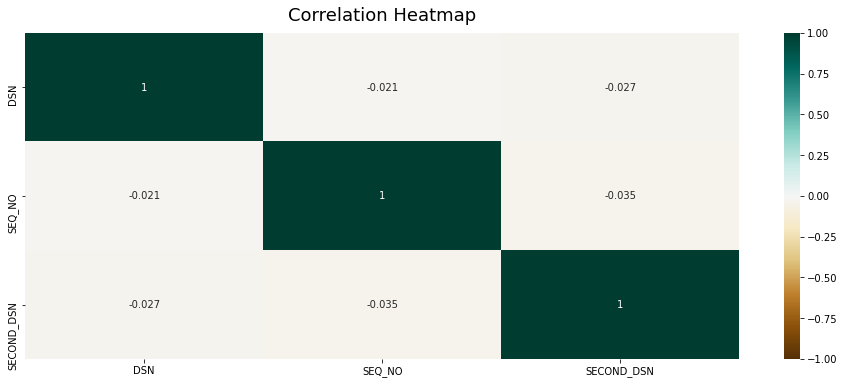

In [25]:
#Most variables are categorical currently; Need to verify how best to proceed

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(u_3_yrs.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [31]:
print(u_3_yrs['RACE'].value_counts())
print(u_3_yrs['SEX'].value_counts())

B    11121
W     5140
A      707
U      312
H      221
I      104
Name: RACE, dtype: int64
M    9819
F    7786
Name: SEX, dtype: int64
